In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px
import numpy as np
from matplotlib.dates import date2num

In [85]:
data = pd.read_csv("../Crime_Data_2010_2017.csv") 
data.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
0,1208575,03/14/2013,03/11/2013,1800,12,77th Street,1241,626,INTIMATE PARTNER - SIMPLE ASSAULT,0416 0446 1243 2000,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,626.0,NaN,NaN,NaN,6300 BRYNHURST AV,NaN,"(33.9829, -118.3338)"
1,102005556,01/25/2010,01/22/2010,2300,20,Olympic,2071,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,VAN NESS,15TH,"(34.0454, -118.3157)"
2,418,03/19/2013,03/18/2013,2030,18,Southeast,1823,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E 104TH ST,NaN,"(33.942, -118.2717)"
3,101822289,11/11/2010,11/10/2010,1800,18,Southeast,1803,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,88TH,WALL,"(33.9572, -118.2717)"
4,42104479,01/11/2014,01/04/2014,2300,21,Topanga,2133,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329,...,NaN,IC,Invest Cont,745.0,NaN,NaN,NaN,7200 CIRRUS WY,NaN,"(34.2009, -118.6369)"


In [86]:
data.shape

(1584316, 26)

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1584316 entries, 0 to 1584315
Data columns (total 26 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   DR Number               1584316 non-null  int64  
 1   Date Reported           1584316 non-null  object 
 2   Date Occurred           1584316 non-null  object 
 3   Time Occurred           1584316 non-null  int64  
 4   Area ID                 1584316 non-null  int64  
 5   Area Name               1584316 non-null  object 
 6   Reporting District      1584316 non-null  int64  
 7   Crime Code              1584316 non-null  int64  
 8   Crime Code Description  1583904 non-null  object 
 9   MO Codes                1412557 non-null  object 
 10  Victim Age              1455657 non-null  float64
 11  Victim Sex              1439117 non-null  object 
 12  Victim Descent          1439084 non-null  object 
 13  Premise Code            1584240 non-null  float64
 14  Pr

In [88]:
data.isnull().sum()

DR Number                       0
Date Reported                   0
Date Occurred                   0
Time Occurred                   0
Area ID                         0
Area Name                       0
Reporting District              0
Crime Code                      0
Crime Code Description        412
MO Codes                   171759
Victim Age                 128659
Victim Sex                 145199
Victim Descent             145232
Premise Code                   76
Premise Description          2751
Weapon Used Code          1059559
Weapon Description        1059560
Status Code                     2
Status Description              0
Crime Code 1                    7
Crime Code 2              1484319
Crime Code 3              1582133
Crime Code 4              1584247
Address                         0
Cross Street              1321583
Location                        9
dtype: int64

In [90]:
def drop_columns(data : pd.DataFrame, columns : list): 
    for col in columns: 
        data.drop(labels=col, axis=1, inplace=True)
    return data


def check_val(data_not_null: pd.DataFrame, crime_code: int, col: str):
    val = None
    for row in range(data_not_null.shape[0]):
        if data_not_null.loc[row, "Crime Code"] == crime_code:
            val = data_not_null.loc[row, col]
            break
    return val

def insert_null_rows(data: pd.DataFrame, data_not_null: pd.DataFrame):
    for col in data.columns:
        for row in range(data.shape[0]):
            if pd.isna(data.loc[row, col]):
                val = check_val(data_not_null=data_not_null, crime_code=data.loc[row, "Crime Code"], col=col)
                if val is None:
                    print(f'Code: {data.loc[row, "Crime Code"]} and Column: {col} is null')
                else:
                    data.at[row, col] = val
    return data


In [91]:
drop_columns(data = data, columns=["Area ID" , "MO Codes","Reporting District", "Premise Code", "Weapon Used Code", "Crime Code 1", "Crime Code 2", "Crime Code 3", "Crime Code 4", "Weapon Description"])
data_non_null = pd.DataFrame(data.groupby("Crime Code").apply(lambda x: x.mode().iloc[0])).drop("Crime Code", axis =1).reset_index().fillna({"Crime Code Description" : data['Crime Code Description'].mode()[0], "Victim Age" : np.mean([x for x in data["Victim Age"].tolist() if pd.notna(x)]), "Cross Street" : data['Cross Street'].mode()[0]})
data_non_null.head()

,Crime Code,DR Number,Date Reported,Date Occurred,Time Occurred,Area Name,Crime Code Description,Victim Age,Victim Sex,Victim Descent,Premise Description,Status Code,Status Description,Address,Cross Street,Location
0,110,100100811,04/05/2010,04/03/2010,2330.0,77th Street,CRIMINAL HOMICIDE,20.0,M,H,STREET,AA,Adult Arrest,7TH ST,MAIN ST,"(33.9656, -118.2651)"
1,113,101714641,07/15/2010,07/09/2010,600.0,Devonshire,"MANSLAUGHTER, NEGLIGENT",11.0,M,A,SINGLE FAMILY DWELLING,AA,Adult Arrest,13600 MARINA POINT DR,BROADWAY,"(33.9876, -118.4489)"
2,121,100100672,08/07/2017,01/01/2010,1.0,77th Street,"RAPE, FORCIBLE",15.0,F,H,SINGLE FAMILY DWELLING,IC,Invest Cont,6TH ST,FIGUEROA ST,"(0, 0)"
3,122,100100501,02/27/2012,01/01/2010,200.0,Rampart,"RAPE, ATTEMPTED",20.0,F,H,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,6TH ST,BROADWAY,"(34.0672, -118.3091)"
4,210,100100522,10/25/2016,01/28/2017,2200.0,77th Street,ROBBERY,21.0,M,H,STREET,IC,Invest Cont,6TH ST,BROADWAY,"(0, 0)"


In [93]:
data_non_null.isnull().sum()

0
Crime Code                0
DR Number                 0
Date Reported             0
Date Occurred             0
Time Occurred             0
Area Name                 0
Crime Code Description    0
Victim Age                0
Victim Sex                0
Victim Descent            0
Premise Description       0
Status Code               0
Status Description        0
Address                   0
Cross Street              0
Location                  0
dtype: int64

In [94]:
data_clened = insert_null_rows(data = data,  data_not_null=data_non_null)
data_clened.isnull().sum()

DR Number                 0
Date Reported             0
Date Occurred             0
Time Occurred             0
Area Name                 0
Crime Code                0
Crime Code Description    0
Victim Age                0
Victim Sex                0
Victim Descent            0
Premise Description       0
Status Code               0
Status Description        0
Address                   0
Cross Street              0
Location                  0
dtype: int64

In [47]:
data_clened.to_csv("../crime-in-la-cleaned.csv")

In [82]:
data_cleaned = pd.read_csv("../crime-in-LA-cleaned.csv").drop("Unnamed: 0", axis = 1)
data_cleaned.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area Name,Crime Code,Crime Code Description,Victim Age,Victim Sex,Victim Descent,Premise Description,Status Code,Status Description,Address,Cross Street,Location,month,year,date
0,1208575,2013-03-14,2013-03-11,1800,77th Street,626,INTIMATE PARTNER - SIMPLE ASSAULT,30.0,F,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",AO,Adult Other,6300 BRYNHURST AV,BROADWAY,"(33.9829, -118.3338)",3,2013,14
1,102005556,2010-01-25,2010-01-22,2300,Olympic,510,VEHICLE - STOLEN,15.0,M,H,STREET,IC,Invest Cont,VAN NESS,15TH,"(34.0454, -118.3157)",1,2010,25
2,418,2013-03-19,2013-03-18,2030,Southeast,510,VEHICLE - STOLEN,12.0,M,H,STREET,IC,Invest Cont,200 E 104TH ST,BROADWAY,"(33.942, -118.2717)",3,2013,19
3,101822289,2010-11-11,2010-11-10,1800,Southeast,510,VEHICLE - STOLEN,15.0,M,H,STREET,IC,Invest Cont,88TH,WALL,"(33.9572, -118.2717)",11,2010,11
4,42104479,2014-01-11,2014-01-04,2300,Topanga,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),84.0,M,W,SINGLE FAMILY DWELLING,IC,Invest Cont,7200 CIRRUS WY,BROADWAY,"(34.2009, -118.6369)",1,2014,11


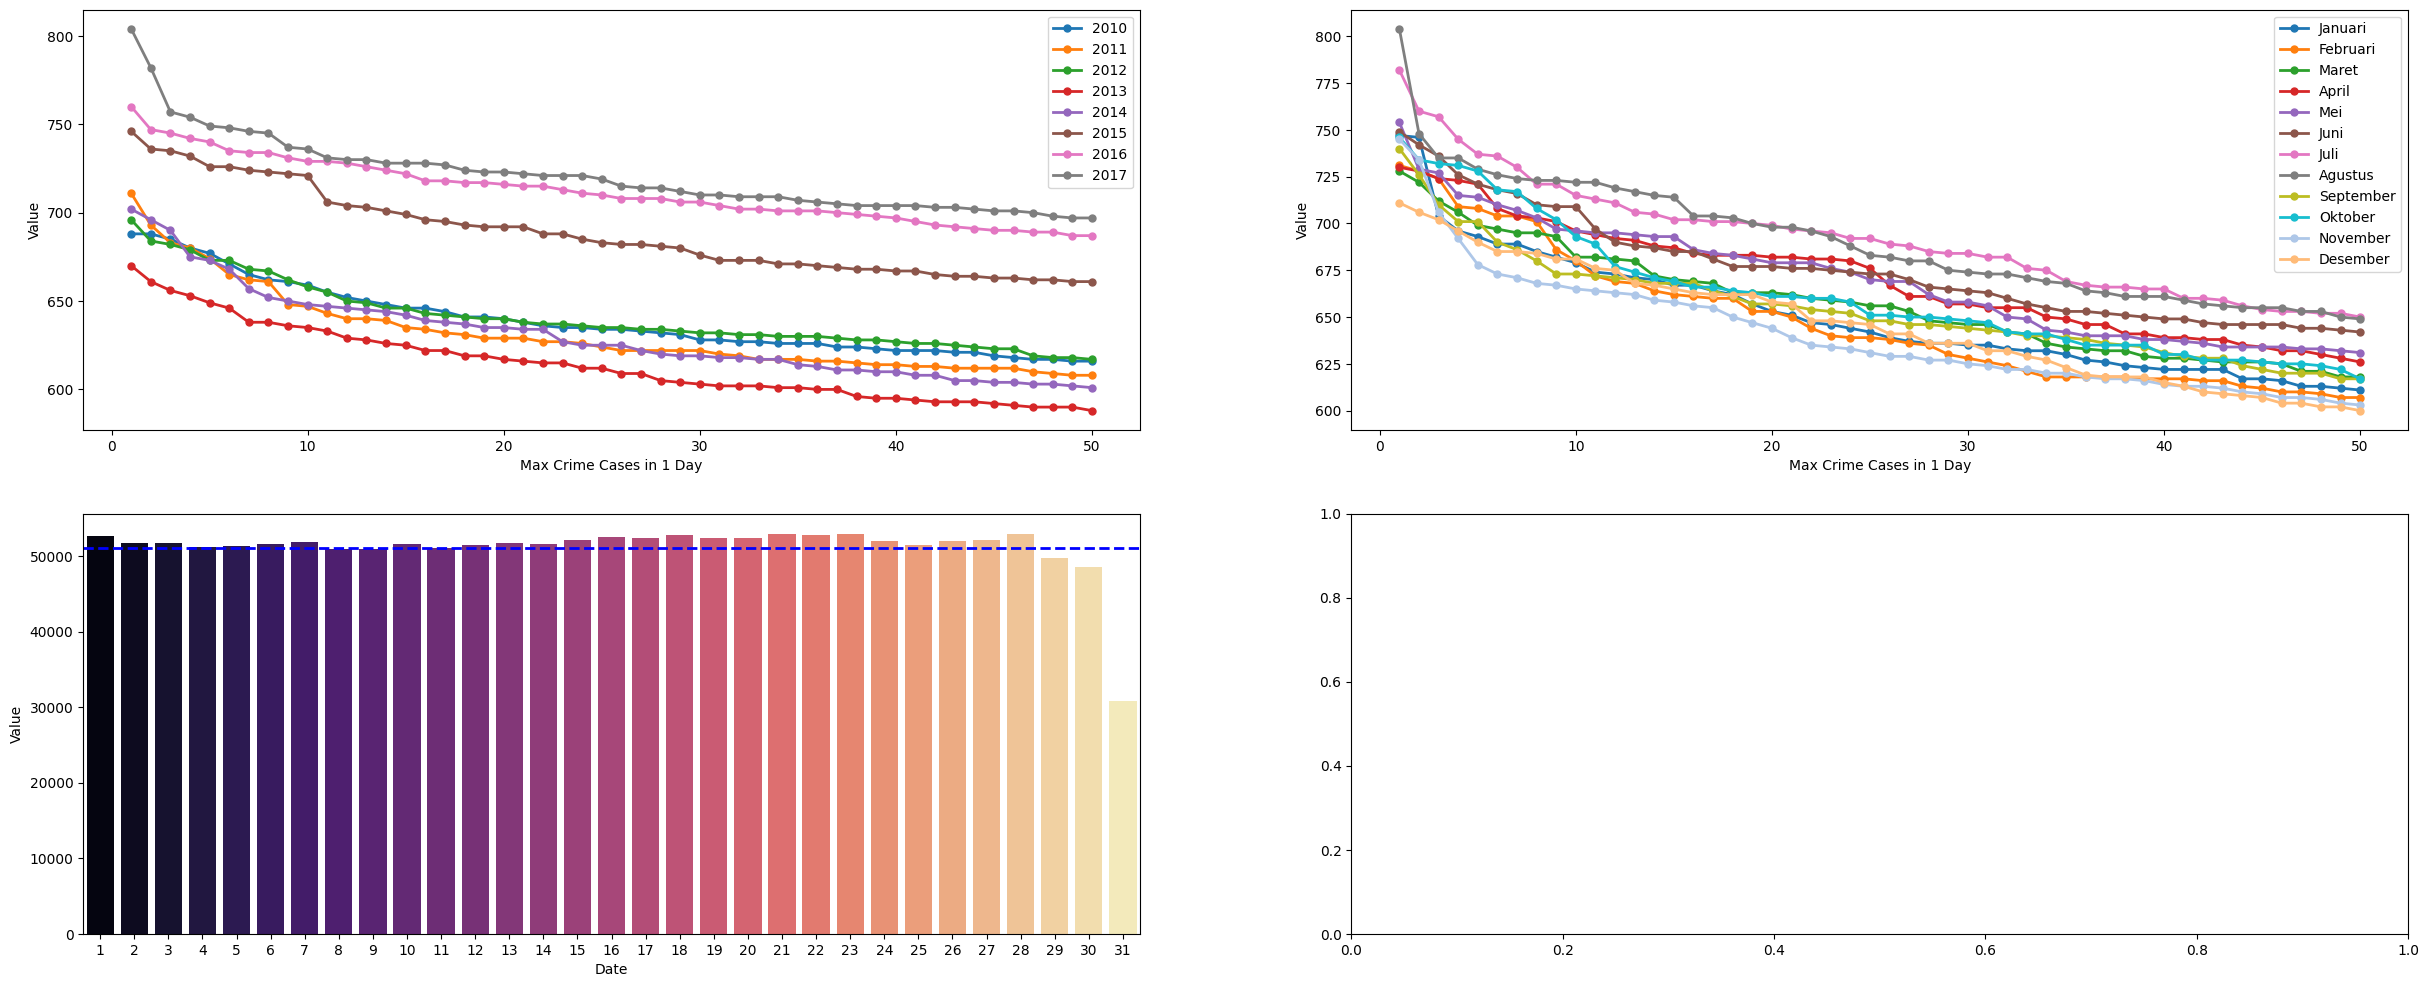

In [108]:
bulan_dict = {
    1: 'Januari',
    2: 'Februari',
    3: 'Maret',
    4: 'April',
    5: 'Mei',
    6: 'Juni',
    7: 'Juli',
    8: 'Agustus',
    9: 'September',
    10: 'Oktober',
    11: 'November',
    12: 'Desember'
}
# colors = [
#     '#1f77b4',  # biru
#     '#ff7f0e',  # oranye
#     '#2ca02c',  # hijau
#     '#d62728',  # merah
#     '#9467bd',  # ungu
#     '#8c564b',  # coklat
#     '#e377c2',  # magenta
#     '#7f7f7f',  # abu-abu
#     '#bcbd22',  # kuning hijau
#     '#17becf',  # biru cyan
#     '#aec7e8',  # biru muda
#     '#ffbb78'   # oranye muda
# ]

colors = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',  # warna dasar
    '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',  # warna tambahan
    '#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5',  # warna muda
    '#c49c94', '#f7b6d2', '#c7c7c7', '#dbdb8d', '#9edae5',  # warna tambahan muda
    '#393b79', '#637939', '#8c6d31', '#843c39', '#7b4173',  # warna gelap
    '#5254a3', '#6b6ecf', '#3182bd', '#31a354', '#756bb1'   # warna terang
    ,'#756bb1'
]



# Anda bisa mengakses warna menggunakan indeks, misalnya colors[0] untuk warna pertama

def get_count(data: pd.DataFrame, col1 : str, col2 : str) -> tuple:
    counts_per_years = []
    attr = []
    for uniq in np.unique(data[col1].tolist()):
        if col1 == "month":
            attr.append(bulan_dict[uniq])
        else: 
            attr.append(uniq)
        temp = sorted([val for val, year in zip(data[col2].tolist(), data[col1].tolist()) if year == uniq], reverse=True)[:50]
        counts_per_years.append(temp)
        temp = []
    
    return counts_per_years, attr


def counts_per_date(data : pd.DataFrame) -> tuple: 
    labels = np.unique(data['date'])
    counts = []
    for label in labels : 
        temp  = 0
        for row in range(data.shape[0]): 
            if data.loc[row, "date"] == label: 
                temp += data.loc[row, "count"]

        counts.append(temp)
    return counts, [str(val) for val in  labels]

        

# def get_counts
# plt.style.use('seaborn-v0_8-dark-palette')
fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (30, 12))
data_grouped = data_cleaned.groupby(["Date Reported", "year"]).size().reset_index(name = "count")
get_count_per_years, years = get_count(data_grouped, col1 = "year", col2 = "count")


# starting to plotting 

for idx, (count, year) in enumerate(zip(get_count_per_years, years)):
    ax[0, 0].plot([x for x in range(1, 51)], count, label = year, marker='o',
     linewidth=2, markersize=5, color = colors[idx])

ax[0, 0].legend()
ax[0, 0].set_xlabel("Max Crime Cases in 1 Day")
ax[0, 0].set_ylabel("Value")

# plotting based on month 

data_grouped = data_cleaned.groupby(["Date Reported", "month"]).size().reset_index(name = "count")
get_count_per_month, years = get_count(data_grouped, col1 = "month", col2 = "count")
for idx, (count, year) in enumerate(zip(get_count_per_month, years)):
    ax[0, 1].plot([x for x in range(1, 51)], count, label = year, marker='o',
     linewidth=2, markersize=5, color = colors[idx])
ax[0, 1].legend()
ax[0, 1].set_xlabel("Max Crime Cases in 1 Day")
ax[0, 1].set_ylabel("Value")


# plotting pie chart dengan diatas tapi gunakana date 
data_grouped = data_cleaned.groupby(["date"]).size().reset_index(name = "count")
data_grouped['date'] = data_grouped['date'].astype(str)
# counts, labels = counts_per_date(data_grouped)
sns.barplot(data=data_grouped, x="date", y="count", palette="magma", ax=ax[1, 0])
# sns.kdeplot(data=data_grouped, x="count", ax=ax[1, 0], color='blue', linewidth=2)
ax[1, 0].set_xlabel("Date")
ax[1, 0].set_ylabel("Value")

# Menambahkan anotasi pada batang

# plottng barplot dengan x= month dan hue = year
ax[1, 0].axhline(data_grouped['count'].mean(), color='blue', linestyle='--', linewidth=2)
# ax[1, 0].axhline(data_grouped['count'].quan, color='blue', linestyle='--', linewidth=2)



# data_grouped = data_cleaned.groupby(["Date Reported", "date"]).size().reset_index(name = "count")
# get_count_per_day, years = get_count(data_grouped, col1 = "date", col2 = "count")
# for idx, (count, year) in enumerate(zip(get_count_per_day, years)):
#     ax[1, 1].plot([x for x in range(1, 51)], count, label = year, marker='o',
#      linewidth=2, markersize=5, color = colors[idx])
# ax[1, 1].legend()
# ax[1, 1].set_xlabel("Max Crime Cases in 1 Day")
# ax[1, 1].set_ylabel("Value")



In [112]:
data_grouped.quantile(q=0.75, axis=0, numeric_only=True) 

count    52409.5
Name: 0.75, dtype: float64

In [45]:
counts

[52651,
 51677,
 51756,
 51212,
 51338,
 51604,
 51847,
 50985,
 50926,
 51634,
 51052,
 51499,
 51781,
 51595,
 52063,
 52568,
 52419,
 52734,
 52359,
 52400,
 52957,
 52761,
 52910,
 52055,
 51414,
 52015,
 52134,
 52888,
 49790,
 48496,
 30796]

([<matplotlib.patches.Wedge at 0x29c3d40dad0>,
 [Text(-1.0980701394231227, 0.06513039925629228, '1'),
  Text(-0.39170300562626953, -1.0278953037072145, '2'),
  Text(0.8554790207187514, -0.6914879934677727, '3'),
  Text(0.9262874945224757, 0.5932886965814151, '4'),
  Text(-0.26839292452781166, 1.0667545350564058, '5')],
 [Text(-0.5989473487762487, 0.035525672321613966, '20.3%'),
  Text(-0.2136561848870561, -0.5606701656584806, '20.0%'),
  Text(0.46662492039204617, -0.3771752691642396, '20.0%'),
  Text(0.5052477242849868, 0.3236120163171355, '19.8%'),
  Text(-0.1463961406515336, 0.5818661100307668, '19.9%')])

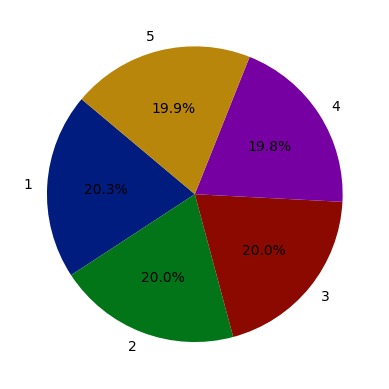

In [44]:
labels1 = ['1',
 '2',
 '3',
 '4',
 '5']
values1 = [52651, 51677, 51756, 51212, 51604]

# Membuat pie chart
plt.pie(values1, labels=labels1, autopct='%1.1f%%', startangle=140)